# Very experimental notebook - not really relevant for further use!

## GOAL: solve the problem of missing data (NaN)
In the current cleaned file, still about 18% of the values are NaN. Deleting all of them would significantly reduce the amount of data. Here I am trying different approaches to imputate them.

Most promising approaches:
* Impute missing values with Mean/Median ... simple but not very accurate
* Use available data to predict missing data (eg. linear regression) ... probably works very well if the amount of missing values is low.
* There is also a Skikitlearn method called simple imputer: https://www.youtube.com/watch?v=GFnwvZVCMro
* Imputation using Deep Learning Library — Datawig ... probably the best result, but I expect it to be quite slow (shouldn't be the problem)

# Readings:
* https://towardsdatascience.com/imputation-of-missing-data-in-tables-with-datawig-2d7ab327ece2
* https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e
* **TUTORIAL:** https://github.com/kennethleungty/DataWig-Missing-Data-Imputation/blob/main/notebooks/DataWig-Example.ipynb
*  **DataWig Doc:** https://datawig.readthedocs.io/en/latest/source/intro.html


Paper about Datawig (Comparission to alternatives):
* https://jmlr.org/papers/v20/18-753.html
* https://www.jmlr.org/papers/volume20/18-753/18-753.pdf (From Amazon Science)


## Issue:
Somehow, I am not able to install datawig (I thought it is caused by the M1 chip, but it also does not work on google colaboratory!

## TODOs:
* As soon as I finished with all those experiments --> build one notebook which executes the final preprocessing steps.
* Improve code reuse-ability - Either figure out how to import functions from another notebook or create a .py file with frequently used functions!

In [13]:
import pandas as pd
import numpy as np
import missingno as msno


#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import Imputer

In [2]:
data = pd.read_csv("../data/NDBC_historical_stdmet_GOM_2020_cleaned.csv")
data.set_index('timestamp', inplace = True)
data.sample(5)

,WVHT_41117,DPD_41117,APD_41117,MWD_41117,WTMP_41117,WVHT_41112,DPD_41112,APD_41112,MWD_41112,ATMP_41112,...,WTMP_wiwf1,TIDE_wiwf1,WTMP_wplf1,TIDE_wplf1,WDIR_wycm6,WSPD_wycm6,GST_wycm6,PRES_wycm6,ATMP_wycm6,WTMP_wycm6
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-10-20 11:00:00,NaN,NaN,NaN,NaN,NaN,1.34,7.14,4.77,98.0,25.2,...,25.9,0.59,26.7,0.56,56.0,3.8,5.0,1017.9,22.8,24.1
2020-01-07 16:00:00,0.46,9.88,3.63,74.0,17.3,0.40,9.88,3.12,70.0,NaN,...,17.3,-1.01,20.0,-0.22,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-11 18:00:00,NaN,NaN,NaN,NaN,NaN,0.33,10.53,7.06,91.0,NaN,...,17.8,0.47,18.6,-0.66,127.0,4.0,4.5,1018.8,20.8,15.3
2020-06-25 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.8,-0.12,31.0,0.29,161.0,5.1,6.0,1019.0,30.5,28.8
2020-03-13 20:00:00,0.62,9.88,7.58,95.0,20.0,0.55,9.88,8.11,108.0,NaN,...,24.9,-0.53,24.6,0.65,156.0,5.2,6.3,1020.5,NaN,NaN


In [3]:
data.isna().any()

WVHT_41117    True
DPD_41117     True
APD_41117     True
MWD_41117     True
WTMP_41117    True
              ... 
WSPD_wycm6    True
GST_wycm6     True
PRES_wycm6    True
ATMP_wycm6    True
WTMP_wycm6    True
Length: 625, dtype: bool

This shows that every column has at least one NaN value!

In [4]:
data.isna().sum()

WVHT_41117    4932
DPD_41117     4945
APD_41117     4932
MWD_41117     5011
WTMP_41117    4933
              ... 
WSPD_wycm6    1217
GST_wycm6     1241
PRES_wycm6    1072
ATMP_wycm6    1184
WTMP_wycm6    1012
Length: 625, dtype: int64

<AxesSubplot: >

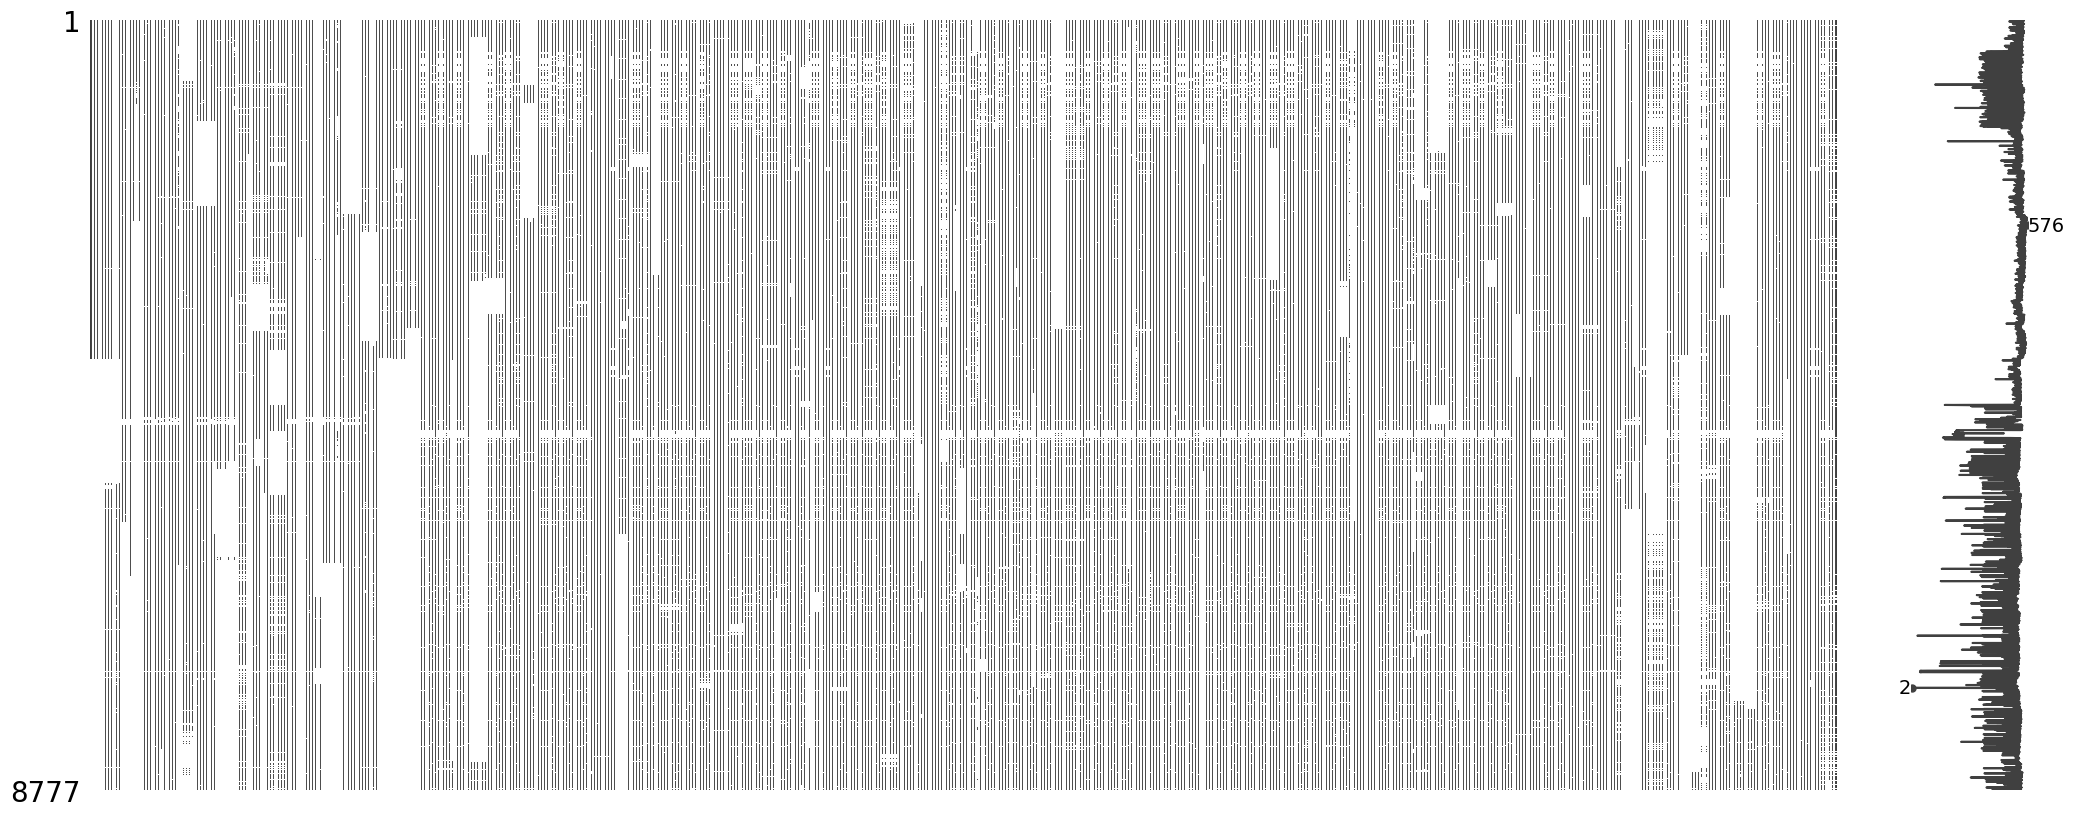

In [14]:
msno.matrix(data)

# Data Imputation 1:
mean, median, most frequent

In [5]:
type(data["WVHT_41117"][6202])

numpy.float64

In [6]:
imputed_data_mean = data.fillna(data.mean()) #replace all NaN values with the column-mean

In [7]:
imputed_data_mean

,WVHT_41117,DPD_41117,APD_41117,MWD_41117,WTMP_41117,WVHT_41112,DPD_41112,APD_41112,MWD_41112,ATMP_41112,...,WTMP_wiwf1,TIDE_wiwf1,WTMP_wplf1,TIDE_wplf1,WDIR_wycm6,WSPD_wycm6,GST_wycm6,PRES_wycm6,ATMP_wycm6,WTMP_wycm6
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.59000,13.330000,4.510000,78.000000,17.400000,0.42,15.38,3.97,85.0,22.413189,...,25.1,-0.02,25.4,0.23,247.0,2.9,4.0,1020.400000,12.5,15.500000
2020-01-01 01:00:00,0.57000,14.290000,4.410000,80.000000,17.400000,0.36,15.38,4.26,85.0,22.413189,...,25.1,0.04,25.4,-0.06,281.0,3.2,4.2,1020.500000,11.3,15.500000
2020-01-01 02:00:00,0.49000,14.290000,4.580000,69.000000,17.400000,0.39,15.38,4.03,90.0,22.413189,...,25.1,0.07,25.5,-0.28,274.0,2.7,3.3,1020.900000,10.9,15.600000
2020-01-01 03:00:00,0.52000,7.690000,4.230000,98.000000,17.400000,0.38,9.09,3.54,108.0,22.413189,...,25.1,0.04,25.5,-0.51,279.0,2.9,3.4,1020.900000,10.3,15.600000
2020-01-01 04:00:00,0.51000,15.380000,3.790000,62.000000,17.400000,0.41,14.29,3.75,83.0,22.413189,...,25.0,-0.01,25.4,-0.69,298.0,1.5,1.7,1021.000000,9.5,15.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,1.07298,8.300331,5.226661,96.095592,20.042144,1.37,8.70,5.57,110.0,18.100000,...,22.4,0.18,21.3,-0.02,120.0,6.6,7.8,1017.528618,22.2,22.548332
2020-12-31 20:00:00,1.07298,8.300331,5.226661,96.095592,20.042144,1.42,8.33,5.51,109.0,17.600000,...,22.8,0.17,21.4,0.28,119.0,7.5,9.6,1017.528618,22.0,17.000000
2020-12-31 21:00:00,1.07298,8.300331,5.226661,96.095592,20.042144,1.46,7.41,5.56,109.0,18.100000,...,22.9,0.20,21.6,0.28,117.0,9.8,11.4,1017.528618,21.0,16.900000


# Data Imputation with k-NN:

= missing values will be replaced by the mean value of the k nearest beighbors measured by eucledian distance.

Tutorial: https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e

Since K-NN is distance-based, normalization is necessary. Otherwise different scales of our data will lead the KNN imputer to generate biased replacements for the missing values.

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
data.head()

,WVHT_41117,DPD_41117,APD_41117,MWD_41117,WTMP_41117,WVHT_41112,DPD_41112,APD_41112,MWD_41112,ATMP_41112,...,WTMP_wiwf1,TIDE_wiwf1,WTMP_wplf1,TIDE_wplf1,WDIR_wycm6,WSPD_wycm6,GST_wycm6,PRES_wycm6,ATMP_wycm6,WTMP_wycm6
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.59,13.33,4.51,78.0,17.4,0.42,15.38,3.97,85.0,NaN,...,25.1,-0.02,25.4,0.23,247.0,2.9,4.0,1020.4,12.5,15.5
2020-01-01 01:00:00,0.57,14.29,4.41,80.0,17.4,0.36,15.38,4.26,85.0,NaN,...,25.1,0.04,25.4,-0.06,281.0,3.2,4.2,1020.5,11.3,15.5
2020-01-01 02:00:00,0.49,14.29,4.58,69.0,17.4,0.39,15.38,4.03,90.0,NaN,...,25.1,0.07,25.5,-0.28,274.0,2.7,3.3,1020.9,10.9,15.6
2020-01-01 03:00:00,0.52,7.69,4.23,98.0,17.4,0.38,9.09,3.54,108.0,NaN,...,25.1,0.04,25.5,-0.51,279.0,2.9,3.4,1020.9,10.3,15.6
2020-01-01 04:00:00,0.51,15.38,3.79,62.0,17.4,0.41,14.29,3.75,83.0,NaN,...,25.0,-0.01,25.4,-0.69,298.0,1.5,1.7,1021.0,9.5,15.5


In [9]:
from sklearn.impute import KNNImputer

k=5

imputer_knn = KNNImputer(n_neighbors=k, weights='uniform', metric='nan_euclidean')
imputed_data_knn = pd.DataFrame(imputer_knn.fit_transform(data_normalized),columns = data_normalized.columns)

In [10]:
imputed_data_knn.isna().any()

WVHT_41117    False
DPD_41117     False
APD_41117     False
MWD_41117     False
WTMP_41117    False
              ...  
WSPD_wycm6    False
GST_wycm6     False
PRES_wycm6    False
ATMP_wycm6    False
WTMP_wycm6    False
Length: 625, dtype: bool

In [11]:
imputed_data_knn

,WVHT_41117,DPD_41117,APD_41117,MWD_41117,WTMP_41117,WVHT_41112,DPD_41112,APD_41112,MWD_41112,ATMP_41112,...,WTMP_wiwf1,TIDE_wiwf1,WTMP_wplf1,TIDE_wplf1,WDIR_wycm6,WSPD_wycm6,GST_wycm6,PRES_wycm6,ATMP_wycm6,WTMP_wycm6
0,0.098667,0.627790,0.251089,0.214485,0.217054,0.080645,0.826087,0.184478,0.233983,0.350725,...,0.555046,0.213820,0.539326,0.580902,0.686111,0.141463,0.125392,0.721545,0.356354,0.344444
1,0.093333,0.681362,0.236575,0.220056,0.217054,0.061290,0.826087,0.221374,0.233983,0.353623,...,0.555046,0.221643,0.539326,0.503979,0.780556,0.156098,0.131661,0.723577,0.323204,0.344444
2,0.072000,0.681362,0.261248,0.189415,0.217054,0.070968,0.826087,0.192112,0.247911,0.353623,...,0.555046,0.225554,0.544944,0.445623,0.761111,0.131707,0.103448,0.731707,0.312155,0.348148
3,0.080000,0.313058,0.210450,0.270195,0.217054,0.067742,0.435404,0.129771,0.298050,0.353623,...,0.555046,0.221643,0.544944,0.384615,0.775000,0.141463,0.106583,0.731707,0.295580,0.348148
4,0.077333,0.742188,0.146589,0.169916,0.217054,0.077419,0.758385,0.156489,0.228412,0.353623,...,0.550459,0.215124,0.539326,0.336870,0.827778,0.073171,0.053292,0.733740,0.273481,0.344444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8772,0.062933,0.316406,0.278374,0.298607,0.128682,0.387097,0.411180,0.388041,0.303621,0.536232,...,0.431193,0.239896,0.308989,0.514589,0.333333,0.321951,0.244514,0.519919,0.624309,0.388148
8773,0.062933,0.316406,0.278374,0.298607,0.128682,0.403226,0.388199,0.380407,0.300836,0.518116,...,0.449541,0.238592,0.314607,0.594164,0.330556,0.365854,0.300940,0.519919,0.618785,0.400000
8774,0.066133,0.225000,0.271118,0.319220,0.139535,0.416129,0.331056,0.386768,0.300836,0.536232,...,0.454128,0.242503,0.325843,0.594164,0.325000,0.478049,0.357367,0.513415,0.591160,0.396296
8775,0.074133,0.286607,0.339042,0.319220,0.167442,0.432258,0.299379,0.356234,0.309192,0.503623,...,0.454128,0.250326,0.331461,0.514589,0.330556,0.487805,0.366771,0.516260,0.591160,0.388889


# TODO:
* How to figure out the best value for k?
* How to evaluate the different methods?

# Data Imputation using MICE (=Multivarate Imputation by Chained Equation)

still struggles installing datawig ... is there an alternative?

In [ ]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

# Define MICE Imputer and fill missing values
imputer_mice = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending', max_iter=30, verbose=2)
imputer_mice.fit(data_normalized)   #fit imputer on the dataset
imputed_data_mice = imputer_mice.transform(data_normalized) #transform the dataset #What exactly happens here?

[IterativeImputer] Completing matrix with shape (8777, 625)
[IterativeImputer] Ending imputation round 1/30, elapsed time 622.33
[IterativeImputer] Change: 61.92041101363309, scaled tolerance: 0.0010000000000000035 
[IterativeImputer] Ending imputation round 2/30, elapsed time 1251.44
[IterativeImputer] Change: 6.584677123246938, scaled tolerance: 0.0010000000000000035 
[IterativeImputer] Ending imputation round 3/30, elapsed time 1896.85
[IterativeImputer] Change: 0.5476601485326822, scaled tolerance: 0.0010000000000000035 
[IterativeImputer] Ending imputation round 4/30, elapsed time 2537.34
[IterativeImputer] Change: 0.46797632658165744, scaled tolerance: 0.0010000000000000035 
[IterativeImputer] Ending imputation round 5/30, elapsed time 3134.59
[IterativeImputer] Change: 0.41835051573769766, scaled tolerance: 0.0010000000000000035 
[IterativeImputer] Ending imputation round 6/30, elapsed time 3731.35
[IterativeImputer] Change: 0.1294942809203839, scaled tolerance: 0.00100000000000

stopped this after about 5 hours execution time ...